# Restricted Boltzman Machines

Basic structure of RBM can be considered a single layer of neural network, a single block connecting to the input layer. Input layer and Hidden layer communicates with each other two-way (forward and backward). Input layer or visibile units is denoted as $v$ and hidden layer or hidden units are denoted by $h$. Two-way communication means that we can calculate $p(v|h)$ and $p(h|v)$. For most discussions, we are talking about Bernoulli RBMs, meaning that both input and hidden units can only take values 0 and 1, such as click or not, signup or not, hence most applications are web based. However, this constraint can be relaxed.

* How to calculate $h$ from $v$: 
\begin{aligned}
\text{Vector form:}
\quad &p(h=1|v) = \sigma(W^Tv + c)\\
\text{Scalar form:}\quad &p(h_j=1|v)= \sigma(\sum_{i=1}^D W_{ij}v_i + c_j) \quad \text{i = 1,..,D}\quad\text{j = 1,..,M}\\
&len(v) = D \quad len(h)=M
\end{aligned}

where $W$ and $c$ are weights and biases of the hidden layer. One important feature is that $W$ is the shared weight for 2-way calculation. Similarly, we have

\begin{aligned}
\text{Vector form:}
\quad &p(v=1|h) = \sigma(Wh + b)\\
\text{Scalar form:}\quad &p(v_i=1|v)= \sigma(\sum_{j=1}^D W_{ij}h_j + b_i) \quad \text{i = 1,..,D}\quad\text{j = 1,..,M}
\end{aligned}

This model only gives us the probabilities. $h$ is the random variable, it does not have specific value, but we can draw samples from this distribution.

We can relaxt 0,1 restriction of the rbm by scaling the values into 0-1 interval. It is then possible to round the values to 0,1 if we want to work with bernoulli variables. However, there is no restriction on $v$ not taking a value between 0 and 1 for calculating $p(h=1|v)$. Another way to relax the restriction on $h$ is to use the probabilities instead of the sampled value. For instance, we can write

\begin{aligned}
\hat{h}=p(h=1|v) = \sigma(W^Tv+c)\\
p(v'=1|h)= \sigma(W\hat{h} + b )
\end{aligned}

This is similar to the way autoencoder works, if we assume that autoencoder has a sigmoid activation at both in hidden and output layers and it shares the weight metrics between its two layers, then going forward in this autoencoder is same as going to the hidden layer and going back to the visible layer in RBM.

If we observe how close input $v$ is close to the output $v'$ by kl-divergence or some crossentropy, this loss function will go down as we train despite directly optimizing for this.



# Motivation for Boltzman Machines

Think about how brain works: Mostly, neurons receives signals from the environment and we integrate that information using our internal pattern recognition in unsupervised manner. 

RBM is similar to this in a way that we are not imposing any structure on it, where everything can be connected to everything, and some units are hidden and some are visible. Visible  neurons can be considered as connected to outer world like sensory neurons, hidden neurans are not directly connected to outer world but are connected to the sensory neurons.

Ludwig Bolzman - statistical mechanics - intuition is that physical systems tend to go to an equilibrium state like from high energy to low energy state. Energy in a boltzman machine is given as 
$$ E = -\Bigg(\sum_{ij} W_{ij}s_is_j + \sum_{i}b_is_i\Bigg)$$

The goal in training boltzman machine is simply to find a thermal equilibrium (maybe not simple as this but anyways), this expression given above looks very similar to the neural network calculation.

In restricted boltzman machines, visible units and hidden units are connected to each other but not neurons of themselves.

Energy in the RBM is defined as

\begin{aligned}
 E(v,h) &= -\Bigg(\sum_{i=1}^D\sum_{j}^M W_{ij}v_ih_j + \sum_{i=1}^Db_iv_i + \sum_{j=1}^M c_jh_j\Bigg) \quad \text{or} \\
E(v,h) &= -\Bigg(v^TWh + b^Tv +  c^Th\Bigg)\\
\text{where}\quad v &= NxDxK \quad h = NxDxK\quad W=DxKxM\quad
b = DxK \quad c=M \quad \text{(dimensions)}
\end{aligned}

Extra $K$ dimension represents the one-hot encoded data. For instance, if we are working with ratings from 1 to 5, we can convert these ratings to a one-hot encoded vector of size 5. For instance rating of 3 would be encoded as [0,0,1,0,0]. For now, we can ignore that dimension as we are not considering non-binary data for mathematical derivations.

Next Steps:
1. Show how this energy function leads to a probabilistic model

2. Show how this probabilistic model leads us to the simple neural network equations shown at the beginning.

# Energy --> Probability Model

The join probability of $v$ and $h$ is proportional to the negative exponent of energy function.

\begin{aligned}
p(v,h)&\propto e^{-E(v,h)}\\
p(v,h)& = \frac{1}{Z}e^{-E(v,h)}\quad Z = \sum_{v}\sum_{h}e^{-E(v,h)} \\
\text
{so that:}&\quad \sum_{v}\sum_{h}e^{-E(v,h)} p(v,h)= 1
\end{aligned}

Why we define probability this way? In statistical mechanics, we have a probability $p_i$ that a system is in a microstate with  energy $E_i$. Through some physics, it can be shown that $p_i$ is proportional to exponent of minus $E_i$ divided by $kT$ where $T$ is a temperature $$ p_i = e^{-E_i/(kT)}\\
p_i = \frac{1}{Z} e^{-E_i/(kT)}\quad Z = \sum_{i}e^{E_i/(kT)}.$$

$Z$ is a normalizing constant and is found by making the sum of probabilities equal to 1. 

## Challenge
A major computation challenge with the RBM equations is that we can not calculate this in a reasonable amount of time. 
$$p(v,h) = \frac{1}{Z}e^{-E(v,h)}\quad Z = \sum_{v}\sum_{h}e^{-E(v,h)}$$

If $v$ have $D$ dimension and $h$ has $M$ dimension, there are 2^{M+D} possible combinations of bernoulli variables. It can not be calculated practically.

# Probabilistic Model --> Neural Network Equations

Using baes rule, we have
\begin{aligned}
p(v|h) = p(v,h)/p(h) = p(v,h)/\sum_{v}p(v,h)\\
p(h|v) = p(v,h)/p(v)= p(v,h)/\sum_{h}p(v,h).
\end{aligned}

Using $E(v,h) = -(v^TWh + b^Tv +  c^Th)$, we can write this as 
\begin{aligned}
p(v,h) &= \frac{1}{Z}\exp(v^TWh + b^Tv +  c^Th)\\
p(v) &= \frac{1}{Z}\sum_{h}\exp(v^TWh + b^Tv +  c^Th)\\
\implies p(h|v) &= \frac{\exp(v^TWh + b^Tv +  c^Th)}{\sum_{h}\exp(v^TWh + b^Tv +  c^Th)}
\end{aligned}

As we can see, $Z$'s are cancelled out, but we still need to sum over $h$ which is intractable. To simplify further, we can ignore the denominator as it is another normalizing constant. Considering it another $Z'$, we have
\begin{aligned}
p(h|v) &= \frac{1}{Z'}\exp\Bigg(\sum_{i=1}^D\sum_{j}^M W_{ij}v_ih_j + \sum_{i=1}^Db_iv_i + \sum_{j=1}^M c_jh_j\Bigg)\\
&= \frac{1}{Z'}\exp(\sum_{i=1}^Db_iv_i) \prod_{j=1}^M\exp\Bigg(h_j\Bigg\{\sum_{i=1}^D W_{ij}v_i + c_j\Bigg\}\Bigg)\\
&=\frac{1}{Z''}\prod_{j=1}^M\exp\Bigg(h_j\Bigg\{\sum_{i=1}^D W_{ij}v_i + c_j\Bigg\}\Bigg)
\end{aligned}
Since each of the $j$ term is independent, we can write
\begin{aligned}
p(h_j|v) &= \frac{1}{Z'''}\exp\Bigg(h_j\Bigg\{\sum_{i=1}^D W_{ij}v_i + c_j\Bigg\}\Bigg)\\
\implies p(h_j=1|v) &= \frac{1}{Z'''}\exp\Bigg(\sum_{i=1}^D W_{ij}v_i + c_j\Bigg)\\
\implies p(h_j=0|v) &= \frac{1}{Z'''} .
\end{aligned}
Since $p(h|v)$ is a valid probability, we must have
\begin{aligned}
&p(h_j=0|v) + p(h_j=1|v)=1 \quad \implies Z''' = 1+\exp\Bigg(\sum_{i=1}^D W_{ij}v_i + c_j\Bigg)
\end{aligned}

Plugging this value into the probability function, we get 

\begin{aligned}
p(h=1|v) = \frac{\exp\Bigg(\sum_{i=1}^D W_{ij}v_i + c_j\Bigg)}{1+\exp\Bigg(\sum_{i=1}^D W_{ij}v_i + c_j\Bigg)} &= \sigma\Bigg(\sum_{i=1}^D W_{ij}v_i + c_j\Bigg) =\sigma(W^Tv + c)
\end{aligned}


# How to Train - Objective and Interpretation

We would like to solve Maximum Likelihood Problem where we maximize $p(v)$ given $W$, $b$ and $c$:
$$W,b,c = argmax_{W,b,c} \log p(v; W,b,c).$$

The problem with this problem is that the cost function is not tractable because the sum takes to long. 

We can instead define new quantity called free energy:
$$F(v) = -\log \sum_{h}e^{-E(v,h)}.\\
\sum_{h}e^{-E(v,h)} = e^{-F(v)}.\\
p(v) = \frac{1}{Z}\sum_{h}e^{-E(v,h)} = \frac{1}{Z}e^{-F(v)} \quad \text{and } Z = \sum_{v}e^{-F(v)}$$

Let us pretend, we can do gradient descent such as
\begin{aligned}
\frac{\partial \log p(v)}{\partial\theta} = \frac{\partial}{\partial \theta}\Bigg(-F(v) - \log Z\Bigg)=-\frac{\partial F(v)}{\partial \theta}  - \frac{1}{Z}\frac{\partial Z}{\partial \theta}
\end{aligned}
Plugging in the expression for $Z$ and rearranging the expression, we get
\begin{aligned}
\frac{\partial \log p(v)}{\partial \theta}= -\frac{\partial F(v)}{\partial \theta}  - \frac{1}{Z}\sum_{v'}\frac{\partial}{\partial\theta}e^{-F(v')}\\
= -\frac{\partial F(v)}{\partial \theta} + \sum_{v'}\frac{1}{Z}e^{-F(v')}\frac{\partial F(v')}{\partial\theta}\\
=-\frac{\partial F(v)}{\partial \theta}  + \sum_{v'}p(v')\frac{\partial F(v')}{\partial\theta}.
\end{aligned}
Flipping the sing on both sides (maximizing log likelihood is same as minimizing negative log likelihood), we get
$$-\frac{\partial \log p(v)}{\partial \theta} = \underbrace{\frac{\partial F(v)}{\partial \theta}}_{\text{positive phase}}  - \underbrace{\sum_{v'}p(v')\frac{\partial F(v')}{\partial\theta}}_{\text{negative phase}} .$$

The gradient is made of positive and negative phases. If we are doing stochastic gradient descen (one feature vector at a time), only the first term depends on $v$, and the role it plays is to makes $v$ more likely, i.e., makes our model more likely to produce these $v$ which are the actual observations.
Second term does not depend on the feature vector $v$ rather sums over all possible values of $v$. The role of the second term is to make all values of $v$ less likely, and it is weighted by the probability of those values of $v$. So the combined effort is to make the actual value (what we see) more likely while making all other values less likely, especially the values of $v$ which are currently likely but have not been yet observed. So if the model currently performs bad and gives a high probability to a value not observed before, the second term reduces its probability more by weighting it by its current probability

# How to train - further simplification



We can see that the negative phase expression is the expected value of $f(v')$ (gradient of free energy), which allows us to write
$$ -\frac{\partial \log p(v)}{\partial \theta} = f(v')  - E(f(v)) \\
E(f(v)) = \sum_{v'}p(v')f(v')$$
We can approximate the expected value by sample mean $$ E(f(v)) = \frac{\sum_{n}f(v_n)}{N}$$.

The way we generate this samples is Markov Chain Monte Carlo Method (MCMC) - especially Gibbs sampling method. The idea is as following:
* Given: $v_1$
* Calculate $p(h_1|v_1)$
* Sample $h_1\sim p(h_1|v_1)$
* Calculate $p(v_2|h_1)$
* Sample $v_2\sim p(v_2|h_1)$
* . . . . .
* $v_{\infty}$ is a sample from $p(v)$

The idea is that as we repeat this procedure infinite times $v$ is guaranted to come from true probability distribution.
However, usually even 1 step is enough.
* $v → p(h|v) → h\sim p(h|v)→p(v'|h)→v'\sim p(v'|h)$ or in short $v→h→v'$

So now, the approximated gradient becomes the difference between free energy gradients (input v and sample v') $$-\frac{\partial \log p(v)}{\partial \theta}  = \frac{\partial F(v)}{\partial \theta} - \frac{\partial F(v')}{\partial \theta}$$
which is called contrastive divergence ($CD-k$) with $k$ steps of Gibbs sampling performed to get $v'$. The above method is $CD-1$, and it can be changed to see if the result improves.

Pseudo Algorithm:
```
for v in dataset:
  p(h=1|v) = sigmoid(W.T.dot(v)+c) # visible to hidden
  h = sample_from(p(h=1|v))
  p(v'=1|h) = sigmoid(W.dot(h)+b) # hidden to visible
  v' = sample_from(p(v'=1|h))
  param = param - learning_rate(grad(F(v))-grad(F(v'))) # find approximated grad
```

Since gradient step is handled automatically by the libraries such as Tensorflow, we just need to define the  loss function (this is not the real loss, just the gradient is what we need) as: $$L = F(v)-F(v')$$.

We previously defined free energy $F(v)$ as $$F(v) = -log \sum_{h}e^{-E(v,h)}$$

One way to calculate this in a tractable way is as follows:
\begin{aligned}
F(v) &= -log \sum_{h}e^{v^TWh + b^Tv +  c^Th} = -b^Tv - log \sum_{h}e^{v^TWh  + c^Th}\\
&=-b^Tv - log \sum_{h}\exp\Bigg\{\sum_{j=1}^{M} v^TW_{:,j}h_j + c_jh_j\bigg\} = -b^Tv - log \sum_{h}\prod_{j=1}^M \exp h_j\Bigg(v^TW_{:,j} + c_j\bigg) 
\end{aligned}

Using Sum-Product rule, we can rearrange the above expression as 
\begin{aligned}
F(v) &= -b^Tv - log \prod_{j=1}^M\sum_{h} \exp h_j\Bigg(v^TW_{:,j} + c_j\bigg) = -b^Tv - \sum_{j=1}^Mlog \sum_{h_j\in\{0,1\}} \exp h_j\Bigg(v^TW_{:,j} + c_j\bigg) \\
&= -b^Tv - \sum_{j=1}^M \log \Bigg\{1+ \exp\Bigg(v^TW_{:,j} + c_j\bigg)\Bigg\}.
\end{aligned}


Finally, free energy is no longer is intractable, the only summation is over j and it is linear, not exponential.

# Application to Movielens Recommendations

Bernoulli RBM does not work since the input is not within the range of [0,1].  In the paper, authors have made the visible units a $k$-class categorical distribution rather than bernoulli distribution. So 10 rating values from 0.5 and 5 are ecnoded to a one-hot vector or dimension 10 for each input rating. The rating 3.5 for instance will be $[0,0,0,0,0,0,1,0,0,0]$. They then use softmax to calculate the probabilities.

The calculations become as follows:
$$p(h_j=1|v) = \sigma(\sum_{k=1}^K\sum_{i=1}^D W_{ij}^k v_i^k + c_j)\\
p(v_i^k = 1|h) = softmax(\sum_{j=1}^M W^k_{ij}h_{j} + b_i)
$$

* Vector Shapes
  *   **h** vector of size M (number of hidden units)
  *   **V** 2D array of size D x K - each movie needs its own categorical distribution, so D is the number of movies (number of input units) and K is the number of possible ratings.
  *   **W** 3D array of size D x K x M
  *   **b** 2D array of size D x K
  *   **c** vector of size M

In movielens example, we also have $N$ dimension which represents the number of samples (number of users) or batch size, so the size of $V$ and $H$ will be $N x D x K$ and $N x M$.

Note that when we sum over both $K$ and $D$, it is not actually dot product ( but double dot product if there is such a thing). 

With categorical inputs, the free energy expression becomes $$F(v) = -b^Tv - \sum_{j=1}^M \log \Bigg\{1+ \exp\Bigg(v^TW_{:,:,j} + c_j\bigg)\Bigg\}
$$

We have implicit double-dot operation over $b$ and $W$ in the above expression. To do this, we will use $tf.tensordot$ which allows multiplying 3 dimensional tensors.

## How to deal with missing ratings

$v_{i,k} = 1$ if a user rates the movie $i$ with $k$ (k corresponds to k/2 rating here).
If rating is missing the one-hot vector will be an array of all zeros. If we have a missing rating, we also want the sampled $v'(i)$ to be an array of all zeros. That way free energy at both $v(i)$ and $v'(i)$ will have the same value, and the difference hence the gradient will be 0, and will not change the parameters due to the missing rating.

## Rating Predictions

After getting probabilities for each rating value (with softmax), we can get a weighted average of the ratings to get the final predicted rating (method used in the paper).

Or predicted value may be found by argmax of softmax outputs.

# Implementation

1. Preoricess ratings dataframe into sparse matrix

2. Build required functions and RBM class

3. Train the model

## Preprocess data to sparse matrices

The preprocess_sparse.py will load and preprocess data by resetting the movie and user ids. It then creates train and test dataframes from the full dataset, creates sparse matrices for train and test set where rows and columns represents users and movies respectively, and each cell value $x_{ij}$ represent user i's rating for movie j.

In [1]:
%%writefile preprocess_sparse.py

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
import time
import argparse

# Create an argument parser
parser = argparse.ArgumentParser()

# Add arguments
parser.add_argument('--input', type=str, default='small_ratings.csv', help='Inpute file path')
parser.add_argument('--test_size', type=float, default=0.8, help='Size/fraction of the test set')

# Parse arguments
args = parser.parse_args()

# Execution time
start_time = time.time()

# Load ratings data
df = pd.read_csv(args.input)

# Create a mapping to reset user and movie Ids
movies = {movie:i for i, movie in enumerate(set(df.movieId.values))}
users = {user:i for i, user in enumerate(set(df.userId.values))}

# Reset movie and user Ids
df['userId'] = df['userId'].apply(lambda x: users[x])
df['movieId'] = df['movieId'].apply(lambda x: movies[x])
print('\nLoad and preprocess complete...')

N = df.userId.max() + 1 # number of users
M = df.movieId.max() + 1 # number of movies

# Split data into train and test by 80/20 split
df = shuffle(df)
cutoff = int(args.test_size*len(df))
df_train = df.iloc[:cutoff]
df_test = df.iloc[cutoff:]
print(f'\nTrain test split complete...')

# Create a sparse rating (users x movies) matrices for train data
print('\nCreating sparse user-movie rating matrixes train and test sets...')
start =  time.time()
s_train = lil_matrix((N,M)) # lil matrix is best when we need to modify the matrix frequentyly
print('\nUpdating sparse train matrix...')
count = 0
for row in df_train.values:
  count+=1
  if count%100000==0: print("processed: %.3f "  % (float(count)/cutoff))
  user,movie = row[0], row[1]  # user and movie id
  s_train[user,movie] = row[2] # rating

# Convert the lil matrix into compressed sparse row matrix
s_train = s_train.tocsr() # csr format is best for matrix-vector multiplication operations
save_npz("train_sparse.npz", s_train)
print(f'\nExecution time = %.3f seconds' %(time.time() - start))

# Create a sparse rating (users x movies) matrices for test data
start =  time.time()
s_test = lil_matrix((N,M)) 
print('\nUpdating sparse test matrix...')
count = 0
for row in df_test.values:
  count+=1
  if count % 50000==0: print("processed: %.3f " % (float(count)/len(df_test)))
  user,movie = row[0], row[1]  # user and movie id
  s_test[user,movie] = row[2] # rating

# Convert the lil matrix into compressed sparse row matrix
s_test = s_test.tocsr() 
save_npz("test_sparse.npz", s_test)
print(f'\nExecution time = %.3f seconds' %(time.time() - start))

# Print total loading and preprocessing time
print(f'\nTotal execution time = %.3f seconds' %(time.time() - start_time))

Writing preprocess_sparse.py


In [ ]:
# Run the train script
!python preprocess_sparse.py --input 'small_ratings.csv' --test_size 0.8 


Load and preprocess complete...

Train test split complete...

Creating sparse user-movie rating matrixes train and test sets...

Updating sparse train matrix...
processed: 0.053 
processed: 0.106 
processed: 0.159 
processed: 0.212 
processed: 0.266 
processed: 0.319 
processed: 0.372 
processed: 0.425 
processed: 0.478 
processed: 0.531 
processed: 0.584 
processed: 0.637 
processed: 0.690 
processed: 0.744 
processed: 0.797 
processed: 0.850 
processed: 0.903 
processed: 0.956 

Execution time = 14.656 seconds

Updating sparse test matrix...
processed: 0.106 
processed: 0.212 
processed: 0.319 
processed: 0.425 
processed: 0.531 
processed: 0.637 
processed: 0.744 
processed: 0.850 
processed: 0.956 

Execution time = 2.942 seconds

Total execution time = 24.467 seconds


# Build the Model

In [2]:
%%writefile train_sparse.py

import numpy as np
from datetime import datetime
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.sparse import csr_matrix, load_npz
import matplotlib.pyplot as plt
import joblib
import argparse

# Create an argument parser
parser = argparse.ArgumentParser()
# Add arguments
parser.add_argument('--epochs', type = int, default  = 10, help = 'Number of epochs')
parser.add_argument('--batch_size', type = int, default = 128, help = 'Batch size')
parser.add_argument('--n_neurons', type = int, default = 256, help = 'Size of Hidden layer')
parser.add_argument('--cd_k', type = int, default = 1, help = 'Number of steps for Gibbs sampling')
parser.add_argument('--learning_rate', type = float, default = 0.01, help = 'Learning rate for training')
parser.add_argument('--output_file', type = str, default = 'weights.pkl', help = 'path for saving model weights')

# Parse the arguments
args = parser.parse_args()

# Load sparse train and test matrices
ratings = load_npz('train_sparse.npz')
test_ratings = load_npz('test_sparse.npz')


# Define parameters
D = ratings.shape[1]  # Number of movies
K = 10  # Number of rating categories (e.g. 1-5 stars)

# Access the arguments and assign to parameters 
M = args.n_neurons  # Number of hidden units
batch_size = args.batch_size  # Batch size for training
learning_rate = args.learning_rate  # Learning rate for Adam optimizer
cd_k = args.cd_k # The number of steps for gibbs sampling
epochs = args.epochs  # Number of epochs to train

# Define auxilary dot product functions for forward and backward layer calculations 
def dot1(V, W):
    # V is N x D x K (batch of visible units)
    # W is D x K x M (weights)
    # returns N x M (hidden layer size)
    return tf.tensordot(V, W, axes=[[1,2], [0,1]])

def dot2(H, W):
    # H is N x M (batch of hiddens)
    # W is D x K x M (weights transposed)
    # returns N x D x K (visible)
    return tf.tensordot(H, W, axes=[[1], [2]])

# Define the RBM model
class RBM(tf.keras.Model):
    def __init__(self, D, K, M):
        super(RBM, self).__init__()
        self.W = tf.Variable(tf.random.normal([D, K, M], stddev= np.sqrt(2/M)))
        self.b = tf.Variable(tf.zeros([D, K], dtype = tf.float32))
        self.c = tf.Variable(tf.zeros([M],dtype = tf.float32))

    def forward_hidden(self, v):
        return tf.nn.sigmoid(dot1(v, self.W) + self.c)

    def forward_logits(self, v):
        Z = self.forward_hidden(v)
        return dot2(Z, self.W) + self.b

    def forward_output(self, v):
        return tf.nn.softmax(self.forward_logits(v))

    def call(self, v):
        p_h_given_v = self.forward_hidden(v) #tf.nn.sigmoid(dot1(v, self.W) + self.c)
        r = tf.random.uniform(shape=tf.shape(input=p_h_given_v))
        h = tf.cast(r < p_h_given_v, dtype=tf.float32)
        return h, p_h_given_v
        
    def free_energy(self, v):
        first_term = -tf.reduce_sum(input_tensor=dot1(v, self.b))
        second_term = -tf.reduce_sum(
            # tf.log(1 + tf.exp(tf.matmul(V, self.W) + self.c)),
            input_tensor=tf.nn.softplus(dot1(v, self.W) + self.c), axis=1)
        return first_term + second_term

    def contrastive_divergence(self, v, mask, k=cd_k):
        h, p_h_given_v = self.call(v)
        for i in range(k):
            logits = dot2(h, self.W) + self.b
            cdist = tfp.distributions.Categorical(logits = logits)
            v = cdist.sample() # shape is (N, D)
            v = tf.one_hot(v, depth=K)*mask # turn it into (N, D, K)
            h, p_h_given_v = self.call(v)
        return v
    
# Define the RBM model object and optimizer
rbm = RBM(D, K, M)
optimizer = tf.optimizers.Adam(learning_rate)

# Define the training loop
n_batch = ratings.shape[0]//batch_size
train_test_error = {'train_sse':[], 'test_sse': []}
for epoch in range(epochs):
    sse_sum, tsse_sum = 0, 0
    sse_count, tsse_count = 0, 0
    for i in range(0, ratings.shape[0], batch_size):
        # Extract the current batch of ratings data and create mask
        x = ratings[i:i+batch_size].toarray()
        x_hot = tf.one_hot(x*2 - 1, K)
        mask2d = tf.cast(x > 0, tf.float32)
        mask = tf.stack([mask2d]*K, axis=-1)

        # Perform one step of contrastive divergence
        with tf.GradientTape() as tape:
            v = rbm.contrastive_divergence(x_hot, mask)
            cost = tf.reduce_mean(rbm.free_energy(x_hot)) - tf.reduce_mean(rbm.free_energy(v))

        # Update the model parameters using the Adam optimizer
        grads = tape.gradient(cost, rbm.trainable_variables)
        optimizer.apply_gradients(zip(grads, rbm.trainable_variables))

        # Calculate train sse
        one_to_ten = tf.constant((np.arange(10) + 1).astype(np.float32) / 2)
        output_visible = rbm.forward_output(x_hot)
        pred = tf.tensordot(output_visible, one_to_ten, axes=[[2], [0]])
        sse = tf.reduce_sum(mask2d * (x - pred) * (x - pred))
        sse_sum = sse_sum + sse
        sse_count = sse_count + tf.reduce_sum(mask2d)

        # Calculate the test sse
        x_test = test_ratings[i:i+batch_size].toarray()
        test_x_hot = tf.one_hot(x_test*2 - 1, K)
        test_mask2d = tf.cast(x_test > 0, tf.float32)
        tsse = tf.reduce_sum(test_mask2d * (x_test - pred) * (x_test - pred))
        tsse_sum = tsse_sum + tsse
        tsse_count = tsse_count + tf.reduce_sum(test_mask2d)
        train_sse = sse_sum/sse_count
        test_sse = tsse_sum/tsse_count

    # Append the costs to train_test_error dictionary
    train_test_error['train_sse'].append(train_sse.numpy())
    train_test_error['test_sse'].append(test_sse.numpy())
    print(f'Epoch {epoch + 1}: Train SSE = {train_sse.numpy()} and Test SSE = {test_sse.numpy()}') 

# Plot mean squared error by epoch
try:
  assert epochs > 0
  plt.figure(figsize = (10,8))
  plt.plot(np.arange(epochs), train_test_error['train_sse'], label = 'Train SSE')
  plt.plot(np.arange(epochs), train_test_error['test_sse'], label = 'Test SSE')
  plt.legend()
  plt.savefig('model_performance')
except: 
  print('No history')
# Save the model weights
joblib.dump(rbm.get_weights(), args.output_file)

Writing train_sparse.py


In [ ]:
# Run the train script
!python train_sparse.py --epochs 10 --batch_size 256 --cd_k 2

2023-02-27 00:22:22.287417: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 00:22:23.558941: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 00:22:23.559049: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 00:22:23.559066: W tensorfl

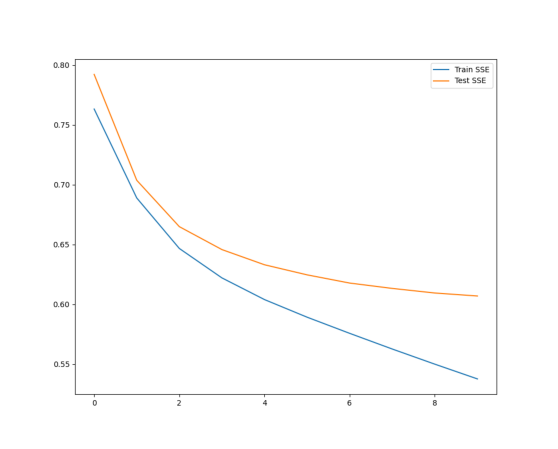

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))
img = plt.imread('model_performance.png')
plt.imshow(img)
plt.axis(False)
plt.show()

# Recommends Movies to the Specific User

In [3]:
%%writefile recommend.py

import joblib
from scipy.sparse import load_npz
import tensorflow as tf
import numpy as np
import argparse

# Create argument parser
arg_parser = argparse.ArgumentParser()

# Add arguments
arg_parser.add_argument('--user_id', type = int, default = 1, help = 'Id of the user')
arg_parser.add_argument('--top_n', type = int, default = 10, help = 'The number of movies to recommend' )

# Parse argument
args = arg_parser.parse_args()

# Access the argument
user_id = args.user_id
n = args.top_n

# Load model weights
W, b, c = joblib.load('weights.pkl')
K = 10
ratings = load_npz('train_sparse.npz')
N = ratings.shape[0]

def dot1(V, W):
    # V is N x D x K (batch of visible units)
    # W is D x K x M (weights)
    # returns N x M (hidden layer size)
    return tf.tensordot(V, W, axes=[[1,2], [0,1]])

def dot2(H, W):
    # H is N x M (batch of hiddens)
    # W is D x K x M (weights transposed)
    # returns N x D x K (visible)
    return tf.tensordot(H, W, axes=[[1], [2]])

def forward_hidden(v):
    return tf.nn.sigmoid(dot1(v, W) + c)

def forward_logits(v):
    Z = forward_hidden(v)
    return dot2(Z, W) + b

def forward_output(v):
    return tf.nn.softmax(forward_logits(v))


def generate_ranking(user_id):
    # Get user ratings 
    user_rating = ratings[user_id,:].toarray()
    user_input = tf.constant(user_rating*2-1, dtype = tf.int32) 
    # Convert to binary             
    user_input_hot = tf.one_hot(user_input, K, dtype = tf.float32)   
    # Predict user ratings for all movies                  
    one_to_ten = tf.constant((np.arange(10) + 1).astype(np.float32) / 2)                
    output_visible = forward_output(user_input_hot)
    pred = tf.squeeze(tf.tensordot(output_visible, one_to_ten, axes=[[2], [0]]))
    # Get the indices of movies already watched by the user
    watched = tf.cast(tf.squeeze(user_rating)>0, dtype = tf.float32)

    # Calculate MAE for the user rating
    pred_watched = np.where(watched,pred,0)
    diff = tf.abs(user_rating - pred_watched)
    count = tf.reduce_sum(watched)
    mae = tf.reduce_sum(diff).numpy()/count.numpy()
    print(f'\n\nAverage prediction deviance for user {user_id} = {mae}')

    # Rank the unwatched movies by rating in descending order
    pred_not_watched = np.where(watched, 0, pred)
    print( f'User has watched {int(tf.reduce_sum(watched).numpy())} movies in total')
    movie_rating = {movie:rating for movie, rating in enumerate(pred_not_watched)}
    top_movies = sorted(movie_rating, key = lambda x: movie_rating[x], reverse = True)
    print(f'Top {n} new recommended movies (ids) for the user {user_id} is: {top_movies[:n]}')
    return user_input, pred

# Get top n recommendations
rating_history, predicted_ratings = generate_ranking(user_id)

Writing recommend.py


In [ ]:
!python recommend.py --user_id 5 --top_n 20

2023-02-27 00:31:41.457239: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-27 00:31:42.649834: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 00:31:42.649976: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-27 00:31:42.650001: W tensorfl